# ABM bimonetario para Bolivia con escasez de divisas, informalidad y transición hacia mayor flexibilidad cambiaria

## 1) Agentes y estados

Agentes: hogares (formales/informales), firmas (con insumos importados), gobierno, banco central e intermediación financiera mínima.

Estados agregados clave:
- Tipos de cambio: $e^o_t$ (oficial), $e^r_t$ (referencial), $e^p_t$ (paralelo)
- Reservas líquidas: $R_t$
- Inflación: $\pi_t$; índice de precios $CPI_t$
- Brecha de producto (proxy): $y^{gap}_t$
- Dolarización (share USD): $s_t$
- Déficit fiscal: $def_t$; deuda pública: $B_t$
- Cuenta corriente: $CA_t$

---

## 2) Segmentación cambiaria y escasez de divisas (núcleo)

Tres precios del USD con cuñas institucionales y de mercado:  
$e^o_t \le e^r_t \le e^p_t$

Referencial como mezcla oficial–mercado (parsimonioso):  
$e^r_t = (1-\omega)\,e^o_t + \omega\,e^p_t,\quad \omega\in(0,1)$

Prima paralela:  
$prem_t \equiv \dfrac{e^p_t}{e^o_t}-1$

Escasez como función de reservas líquidas:  
$Scarcity_t=\max\left\{0,\dfrac{R^\star-R_t}{R^\star}\right\}$

Dinámica del paralelo (prima por escasez + inflación + shock):  
$\Delta \ln e^p_{t+1}=\gamma_0+\gamma_R\,Scarcity_t+\gamma_\pi\,\pi_t+\varepsilon^{e}_{t+1}$

---

## 3) Hogares: ingreso, consumo y cartera bimonetaria

Ingreso nominal del hogar $i$:  
$Y_{i,t}=w_{i,t}\ell_{i,t}+b_u\cdot \mathbb{1}\{unemp\}+r^{Bs}_t A^{Bs}_{i,t}+r^{USD}_t\,e^p_t A^{USD}_{i,t}$

Impuestos (captura informalidad: solo formal tributa salarios):  
$T_{i,t}=\tau_w\,w_{i,t}\ell_{i,t}\cdot \mathbb{1}\{formal\}+\tau_k\,r^{Bs}_t A^{Bs}_{i,t}$

Ingreso disponible:  
$Y^d_{i,t}=Y_{i,t}-T_{i,t}+TR_{i,t}$

Consumo (regla MPC implementable en ABM):  
$C_{i,t}=\min\{A^{liq}_{i,t}+Y^d_{i,t},\; c_y Y^d_{i,t}+c_a A^{liq}_{i,t}\},\quad C_{i,t}\ge 0$

Share de USD en riqueza líquida (dolarización individual):  
$s_{i,t}\equiv \dfrac{e^p_t A^{USD}_{i,t}}{A^{Bs}_{i,t}+e^p_t A^{USD}_{i,t}}$

Elección de cartera (logit; microfundamento ligero):  
$s_{i,t}=\Lambda\!\left(\alpha_0+\alpha_{\pi}\mathbb{E}_t[\pi_{t+1}]+\alpha_{e}\mathbb{E}_t[\Delta \ln e^p_{t+1}]+\alpha_R Scarcity_t+\alpha_{inf}\mathbb{1}\{i\in informal\}-\alpha_r(r^{Bs}_t-r^{USD}_t)+\xi_{i,t}\right)$

donde $\Lambda(x)=\dfrac{1}{1+e^{-x}}$ y $\xi_{i,t}$ es heterogeneidad idiosincrática.

---

## 4) Firmas: costos importados, precios y empleo formal/informal

Producción (forma reducida):  
$y_{j,t}=A_{j,t}\,k_{j,t}^{\alpha}\,\ell_{j,t}^{1-\alpha}$

Tipo de cambio efectivo de pago de importados (depende del canal):  
$e^{pay}_{j,t}\in\{e^r_t,e^p_t\}$

Costo marginal con componente importado (parsimonioso):  
$MC_{j,t}=\dfrac{w_t}{A_{j,t}}+\theta^{imp}_j\,e^{pay}_{j,t} P_t^{*}$

Precios con markup:  
$P_{j,t}=\mu_j\,MC_{j,t}$

Con rigidez (ajuste parcial):  
$\ln P_{j,t}=\rho_p \ln P_{j,t-1}+(1-\rho_p)\ln(\mu_j MC_{j,t})$

Dualidad laboral (regla simple de informalidad en el empleo de la firma):  
$\phi_{j,t}=\Lambda\!\left(\delta_0+\delta_1\big(w^{formal}_t(1+\tau_{ss})-w^{inf}_t\big)-\delta_2\,Enforcement_t\right)$

---

## 5) Inflación: brecha de producto + pass-through del paralelo + escasez

Ecuación semi-estructural (muy implementable):  
$\pi_t=\rho_\pi \pi_{t-1}+\kappa\,y^{gap}_t+\lambda_e\,\Delta \ln(e^p_t)+\lambda_s\,\Delta Scarcity_t+\varepsilon^\pi_t$

---

## 6) Sector externo y reservas

Dinámica de reservas líquidas:  
$R_{t+1}=R_t+CA_t+F_t-FXSupply_t$

Cuenta corriente (reducida):  
$CA_t=\bar{CA}+\psi_y\,y^{gap}_t-\psi_{prem}\,prem_t+\varepsilon^{ca}_t$

Oferta efectiva de divisas (intervención/racionamiento):  
$FXSupply_t=\min\{\bar{S}+\eta_R R_t,\;\bar{D}^{fx}_t\}$

---

## 7) Gobierno: consolidación fiscal y financiamiento

Restricción presupuestaria (nominal):  
$G_t+TR_t+i_t B_{t-1}=T_t+\Delta B_t+\Delta M_t+e^p_t \Delta B^{*}_t$

Trayectoria de consolidación (déficit):  
$def_t=def_0-\psi\cdot t,\quad def_t\ge def_{min}$

Monetización (dominancia fiscal que cae con la consolidación):  
$\Delta M_t=\chi_{fd}\,def_t,\quad \chi_{fd}\downarrow \text{ en el tiempo}$

---

## 8) Banco Central: regla monetaria y transición a mayor flexibilidad

Regla tipo Taylor (fase flexible / transición):  
$i_t=\max\{0,\;r^\star+\phi_\pi(\pi_t-\pi^\star)+\phi_y y^{gap}_t+\phi_e \Delta \ln(e^p_t)\}$

Actualización del tipo oficial en post-switch (crawling/banda):  
$\Delta \ln e^o_{t+1}=\zeta_\pi(\pi_t-\pi^\star)+\zeta_R Scarcity_t$

Intervención condicionada por reservas:  
$FXSupply_t=\min\{\bar{S},\;\vartheta R_t\}$

---

## 9) Medidas de dolarización/desdolarización (salidas del modelo)

Dolarización financiera agregada:  
$s_t=\dfrac{1}{N}\sum_{i=1}^N s_{i,t}$

Dolarización transaccional (USD efectivo como liquidez; opcional):  
$m^{USD}_t=\dfrac{1}{N}\sum_{i=1}^N m^{USD}_{i,t},\quad m^{USD}_{i,t}\uparrow \text{ si } Scarcity_t\uparrow$

---

## 10) Timing de simulación ABM (pasos por período)
1. Actualiza $R_t$ usando $CA_t$, financiamiento y ventas FX.
2. Calcula $Scarcity_t$ y actualiza $e^p_t$; obtiene $e^r_t$.
3. Banco Central fija $i_t$ y regla de intervención (según régimen).
4. Firmas producen, pagan costos (incluido importado a $e^{pay}_{j,t}$), fijan $P_{j,t}$ y eligen mix formal/informal.
5. Hogares reciben ingresos, forman $\mathbb{E}[\pi]$ y $\mathbb{E}[\Delta\ln e^p]$, eligen $s_{i,t}$ y consumen $C_{i,t}$.
6. Se agregan $\pi_t$, $y^{gap}_t$, $s_t$, $def_t$, y se itera.


Imports y utilidades

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gini(x):
    """
    Coeficiente de Gini para vector x >= 0.
    """
    x = np.asarray(x, dtype=float)
    if np.any(x < 0):
        raise ValueError("Gini requiere x >= 0.")
    if np.allclose(x.sum(), 0):
        return 0.0
    x_sorted = np.sort(x)
    n = len(x_sorted)
    cumx = np.cumsum(x_sorted)
    # Fórmula estándar discreta
    g = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    return g

def lorenz_curve(x):
    """
    Devuelve (p, L(p)) para la curva de Lorenz.
    p: proporción acumulada de población
    L: proporción acumulada de riqueza
    """
    x = np.asarray(x, dtype=float)
    x_sorted = np.sort(x)
    cumx = np.cumsum(x_sorted)
    total = cumx[-1] if cumx[-1] > 0 else 1.0
    L = np.insert(cumx / total, 0, 0.0)
    p = np.linspace(0, 1, len(L))
    return p, L

def top_share(x, q=0.10):
    """
    Participación de riqueza del top q (ej: q=0.10 => top 10%).
    """
    x = np.asarray(x, dtype=float)
    n = len(x)
    k = int(np.ceil((1 - q) * n))
    xs = np.sort(x)
    top = xs[k:]
    return top.sum() / xs.sum()


Simulador ABM (ahorro homogéneo o heterogéneo + impuesto)

In [2]:
def simulate_wealth_exchange(
    N=2000,
    T=200,                 # número de "rondas" (cada ronda ~ N emparejamientos)
    w0=1.0,
    s=0.25,                # ahorro común (si s_i es None)
    s_i=None,              # ahorro heterogéneo por agente (array de tamaño N)
    tau=0.0,               # impuesto proporcional por ronda
    seed=123
):
    """
    ABM de intercambio de riqueza:
      - Emparejamiento aleatorio y reparto aleatorio del excedente no-ahorrado.
      - Opción de impuesto tau y redistribución lump-sum al final de cada ronda.

    Retorna:
      w: riqueza final (N,)
      stats: diccionario con series temporales (gini, top10, total)
    """
    rng = np.random.default_rng(seed)
    w = np.full(N, w0, dtype=float)

    if s_i is not None:
        s_i = np.asarray(s_i, dtype=float)
        if s_i.shape != (N,):
            raise ValueError("s_i debe tener tamaño (N,).")
        if np.any((s_i < 0) | (s_i >= 1)):
            raise ValueError("Cada s_i debe cumplir 0 <= s_i < 1.")
    else:
        if not (0 <= s < 1):
            raise ValueError("s debe cumplir 0 <= s < 1.")

    gini_series = []
    top10_series = []
    total_series = []

    for t in range(T):
        # Una "ronda": N emparejamientos
        for _ in range(N):
            i = rng.integers(0, N)
            j = rng.integers(0, N)
            while j == i:
                j = rng.integers(0, N)

            eps = rng.random()

            wi, wj = w[i], w[j]

            if s_i is None:
                si = sj = s
            else:
                si, sj = s_i[i], s_i[j]

            pool = (1 - si) * wi + (1 - sj) * wj
            w[i] = si * wi + eps * pool
            w[j] = sj * wj + (1 - eps) * pool

        # Política fiscal opcional: impuesto proporcional + redistribución uniforme
        if tau > 0:
            tax = tau * w
            revenue = tax.sum()
            w = w - tax + revenue / N

        # Estadísticas por ronda
        gini_series.append(gini(w))
        top10_series.append(top_share(w, q=0.10))
        total_series.append(w.sum())

    stats = {
        "gini": np.array(gini_series),
        "top10": np.array(top10_series),
        "total": np.array(total_series)
    }
    return w, stats


Correr un caso base y graficar dinámica

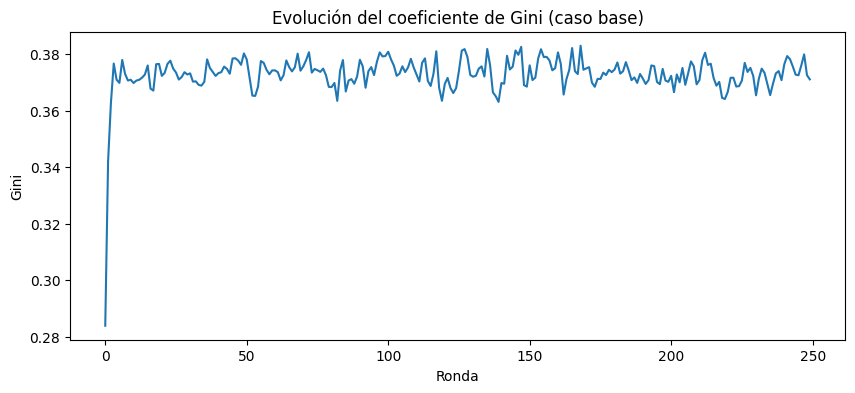

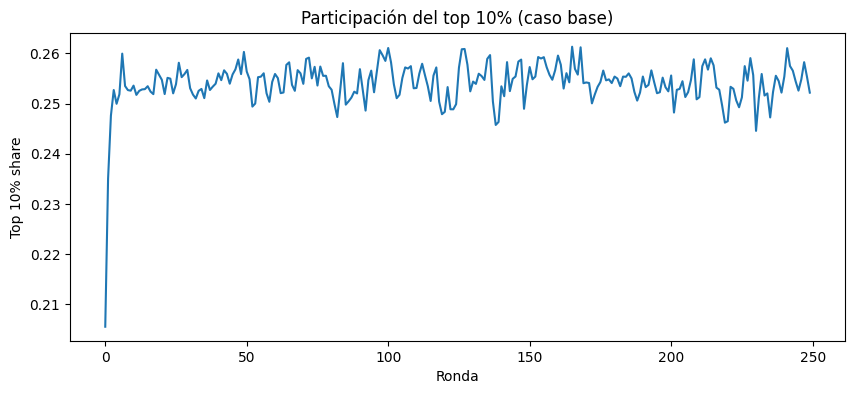

In [3]:
# Caso base: ahorro homogéneo s=0.25, sin impuestos
w_base, st_base = simulate_wealth_exchange(N=3000, T=250, s=0.25, tau=0.0, seed=7)

fig = plt.figure(figsize=(10,4))
plt.plot(st_base["gini"])
plt.title("Evolución del coeficiente de Gini (caso base)")
plt.xlabel("Ronda")
plt.ylabel("Gini")
plt.show()

fig = plt.figure(figsize=(10,4))
plt.plot(st_base["top10"])
plt.title("Participación del top 10% (caso base)")
plt.xlabel("Ronda")
plt.ylabel("Top 10% share")
plt.show()


Distribución final + Lorenz

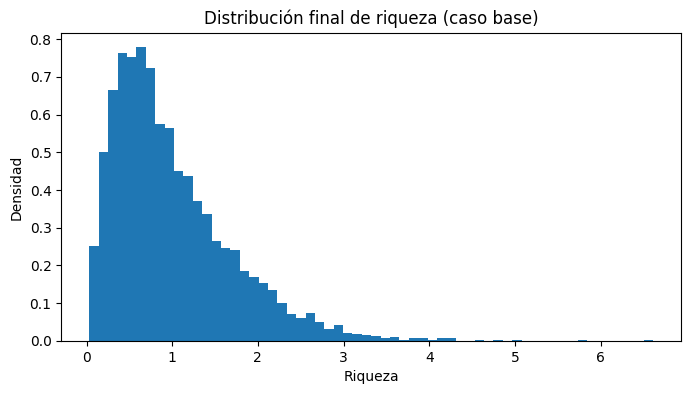

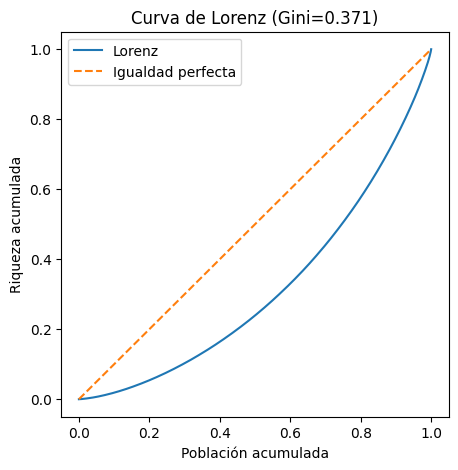

In [4]:
# Histograma de riqueza final
fig = plt.figure(figsize=(8,4))
plt.hist(w_base, bins=60, density=True)
plt.title("Distribución final de riqueza (caso base)")
plt.xlabel("Riqueza")
plt.ylabel("Densidad")
plt.show()

# Curva de Lorenz
p, L = lorenz_curve(w_base)
fig = plt.figure(figsize=(5,5))
plt.plot(p, L, label="Lorenz")
plt.plot([0,1], [0,1], linestyle="--", label="Igualdad perfecta")
plt.title(f"Curva de Lorenz (Gini={gini(w_base):.3f})")
plt.xlabel("Población acumulada")
plt.ylabel("Riqueza acumulada")
plt.legend()
plt.show()


Experimento: comparar ahorro y política fiscal

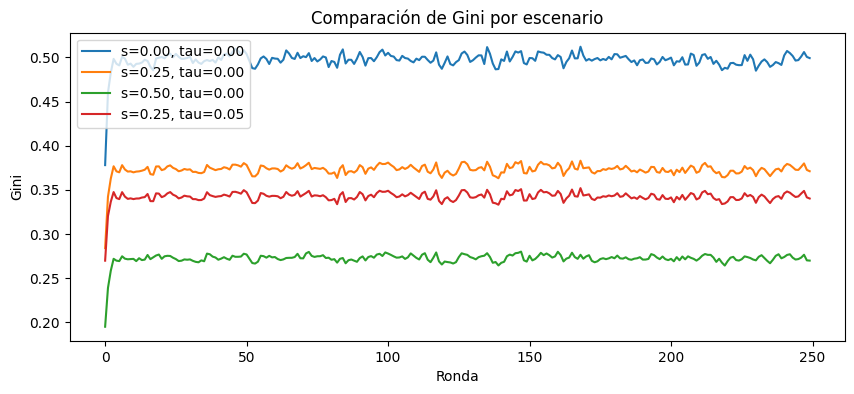

Gini final:
  s=0.00, tau=0.00  -> 0.499
  s=0.25, tau=0.00  -> 0.371
  s=0.50, tau=0.00  -> 0.270
  s=0.25, tau=0.05  -> 0.340

Top 10% share final:
  s=0.00, tau=0.00  -> 0.330
  s=0.25, tau=0.00  -> 0.252
  s=0.50, tau=0.00  -> 0.201
  s=0.25, tau=0.05  -> 0.237


In [5]:
# (A) Sin ahorro (s=0): tiende a desigualdad alta/volátil (y más "ruido")
w_s0, st_s0 = simulate_wealth_exchange(N=3000, T=250, s=0.0, tau=0.0, seed=7)

# (B) Más ahorro (s=0.50): típicamente cambia la forma de la distribución
w_s50, st_s50 = simulate_wealth_exchange(N=3000, T=250, s=0.50, tau=0.0, seed=7)

# (C) Caso base con impuesto y redistribución
w_tax, st_tax = simulate_wealth_exchange(N=3000, T=250, s=0.25, tau=0.05, seed=7)

fig = plt.figure(figsize=(10,4))
plt.plot(st_s0["gini"], label="s=0.00, tau=0.00")
plt.plot(st_base["gini"], label="s=0.25, tau=0.00")
plt.plot(st_s50["gini"], label="s=0.50, tau=0.00")
plt.plot(st_tax["gini"], label="s=0.25, tau=0.05")
plt.title("Comparación de Gini por escenario")
plt.xlabel("Ronda")
plt.ylabel("Gini")
plt.legend()
plt.show()

print("Gini final:")
print(f"  s=0.00, tau=0.00  -> {gini(w_s0):.3f}")
print(f"  s=0.25, tau=0.00  -> {gini(w_base):.3f}")
print(f"  s=0.50, tau=0.00  -> {gini(w_s50):.3f}")
print(f"  s=0.25, tau=0.05  -> {gini(w_tax):.3f}")

print("\nTop 10% share final:")
print(f"  s=0.00, tau=0.00  -> {top_share(w_s0):.3f}")
print(f"  s=0.25, tau=0.00  -> {top_share(w_base):.3f}")
print(f"  s=0.50, tau=0.00  -> {top_share(w_s50):.3f}")
print(f"  s=0.25, tau=0.05  -> {top_share(w_tax):.3f}")


Extensión potente: ahorro heterogéneo (cola tipo Pareto)

Gini final (heterogéneo): 0.428
Top 10% share final (heterogéneo): 0.295


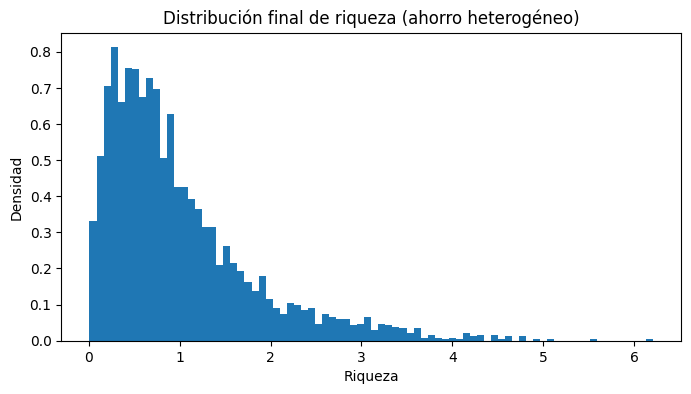

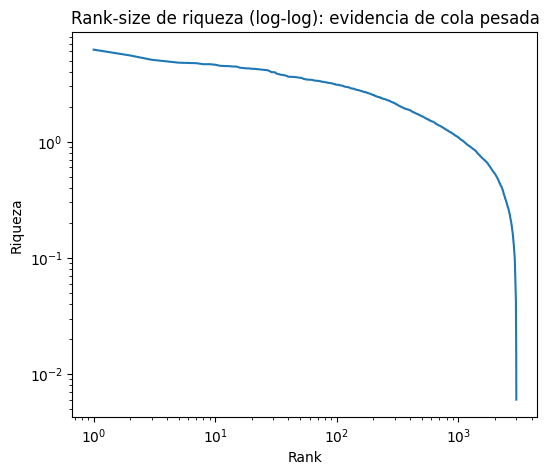

In [6]:
# Ahorro heterogéneo por agente (s_i ~ Uniforme[0, 0.9])
rng = np.random.default_rng(7)
s_i = rng.uniform(0.0, 0.9, size=3000)

w_het, st_het = simulate_wealth_exchange(N=3000, T=400, s_i=s_i, tau=0.0, seed=7)

print(f"Gini final (heterogéneo): {gini(w_het):.3f}")
print(f"Top 10% share final (heterogéneo): {top_share(w_het):.3f}")

# Histograma
fig = plt.figure(figsize=(8,4))
plt.hist(w_het, bins=80, density=True)
plt.title("Distribución final de riqueza (ahorro heterogéneo)")
plt.xlabel("Riqueza")
plt.ylabel("Densidad")
plt.show()

# Rank-size (log-log) para ver cola (si aparece)
w_sorted = np.sort(w_het)[::-1]
ranks = np.arange(1, len(w_sorted) + 1)

fig = plt.figure(figsize=(6,5))
plt.loglog(ranks, w_sorted)
plt.title("Rank-size de riqueza (log-log): evidencia de cola pesada")
plt.xlabel("Rank")
plt.ylabel("Riqueza")
plt.show()


# Escenario ABM: transición de desdolarización → dolarización (cambio de régimen) y cómo se modifican las ecuaciones

## 1) Idea económica del “switch”
El paso de un régimen de **desdolarización** a uno de **(re)dolarización** se interpreta como un cambio en:
1) **Restricción externa**: cae la disponibilidad de USD (reservas líquidas / flujos), sube la escasez.
2) **Segmentación cambiaria**: más agentes quedan fuera del canal oficial/referencial y terminan en el paralelo.
3) **Expectativas**: suben expectativas de depreciación e inflación, aumentando la demanda por USD como cobertura y liquidez.
4) **Pass-through e inflación**: el precio sombra de importados se alinea más con el paralelo y/o aparece racionamiento (escasez) que eleva markups y costos.
5) **Distribución**: hogares con mejor acceso a FX (y típicamente más formales) preservan mejor poder adquisitivo; hogares informales tienden a dolarizar transaccionalmente (efectivo USD) y enfrentan más fricciones.

---

## 2) Variable de régimen e interpretación
Definimos un estado discreto $z_t \in \{0,1\}$:

- $z_t=0$: **desdolarización** (prima paralela baja, acceso FX más amplio, expectativas ancladas).
- $z_t=1$: **dolarización** (escasez alta, prima paralela alta, acceso FX restringido, expectativas desancladas).

---

## 3) Regla de cambio de régimen (exógena o endógena)

### 3.1 Switch exógeno (para escenarios)
$z_t = 0 \;\; \forall t < t_s,\qquad z_t = 1 \;\; \forall t \ge t_s$

### 3.2 Switch endógeno con histéresis (recomendado)
Definimos umbrales “entrada” y “salida”:

Entrada a dolarización si:
$R_t < R^{crit}$  o  $\pi_t > \pi^{crit}$  o  $prem_t > prem^{crit}$

Salida hacia desdolarización si:
$R_t > R^{back}$ y $\pi_t < \pi^{back}$ y $prem_t < prem^{back}$

Regla:
- si $z_{t-1}=0$: $z_t=1$ cuando se cumple la condición de entrada; si no, $z_t=0$.
- si $z_{t-1}=1$: $z_t=0$ solo cuando se cumple la condición de salida; si no, $z_t=1$.

Esto evita “saltos” frecuentes y reproduce persistencia típica de episodios de dolarización.

---

## 4) Segmentación cambiaria: qué cambia con el régimen

### 4.1 Tres precios del USD
Se mantiene la estructura:
$e^o_t \le e^r_t \le e^p_t$

Referencial como mezcla:
$e^r_t = (1-\omega_t)\,e^o_t + \omega_t\,e^p_t$

### 4.2 Cambio clave en el régimen: $\omega_t$ y acceso a canales
En $z_t=0$ (desdolarización): mayor peso del oficial en el referencial, $\omega_t$ bajo.  
En $z_t=1$ (dolarización): el referencial se “pega” más al paralelo, $\omega_t$ alto.

Formalización:
$\omega_t = \omega_0 + \omega_1 z_t,\quad \omega_1>0$

### 4.3 Probabilidad de acceso al canal oficial/referencial
Define una probabilidad de acceso (por hogar/firma):
$p^{access}_t = \bar p_0 - \bar p_1 z_t - \bar p_R Scarcity_t,\quad \bar p_1,\bar p_R>0$

Interpretación:
- En dolarización ($z_t=1$) y con escasez alta, cae $p^{access}_t$.
- Más transacciones se valoran a $e^p_t$.

---

## 5) Reservas líquidas y escasez (estado que dispara el switch)

Escasez:
$Scarcity_t = \max\left\{0,\dfrac{R^\star-R_t}{R^\star}\right\}$

Dinámica de reservas:
$R_{t+1} = R_t + CA_t + F_t - FXSupply_t$

Canal de régimen:
- En $z_t=1$, $FXSupply_t$ cae (intervención más limitada por reservas) y/o aumenta demanda por FX.
- En $z_t=0$, mayor estabilidad permite mayor provisión relativa.

Ejemplo (parsimonioso):
$FXSupply_t = \min\{\bar S_0 - \bar S_1 z_t,\; \vartheta R_t\},\quad \bar S_1>0$

---

## 6) Tipo de cambio paralelo: prima por escasez y régimen
Definimos la prima:
$prem_t = \dfrac{e^p_t}{e^o_t}-1$

Dinámica del paralelo:
$\Delta \ln e^p_{t+1} = \gamma_0 + \gamma_R Scarcity_t + \gamma_\pi \pi_t + \gamma_z z_t + \varepsilon^e_{t+1}$

Interpretación:
- $\gamma_z>0$ captura un salto de expectativas/segmentación cuando el régimen pasa a dolarización.

---

## 7) Hogares: cartera bimonetaria y cómo cambia con el régimen

### 7.1 Share de USD (dolarización individual)
$s_{i,t} = \dfrac{e^p_t A^{USD}_{i,t}}{A^{Bs}_{i,t}+e^p_t A^{USD}_{i,t}}$

### 7.2 Regla de elección (logit) con parámetros dependientes del régimen
$s_{i,t} = \Lambda\!\left(
\alpha_{0,t}
+\alpha_{\pi,t}\,\mathbb{E}_t[\pi_{t+1}]
+\alpha_{e,t}\,\mathbb{E}_t[\Delta \ln e^p_{t+1}]
+\alpha_{R,t}\,Scarcity_t
+\alpha_{inf,t}\,\mathbb{1}\{i\in informal\}
-\alpha_{r,t}(r^{Bs}_t-r^{USD}_t)
+\xi_{i,t}
\right)$

donde $\Lambda(x)=\dfrac{1}{1+e^{-x}}$.

**Cambio de régimen = cambio de sensibilidades:**
$\alpha_{\pi,t} = \alpha_\pi^{(0)} + \alpha_\pi^{(1)} z_t,\quad \alpha_\pi^{(1)}>0$  
$\alpha_{e,t} = \alpha_e^{(0)} + \alpha_e^{(1)} z_t,\quad \alpha_e^{(1)}>0$  
$\alpha_{R,t} = \alpha_R^{(0)} + \alpha_R^{(1)} z_t,\quad \alpha_R^{(1)}>0$  
$\alpha_{inf,t} = \alpha_{inf}^{(0)} + \alpha_{inf}^{(1)} z_t,\quad \alpha_{inf}^{(1)}\ge 0$

Interpretación:
- En dolarización, la cartera reacciona más fuerte a inflación, depreciación y escasez.
- La informalidad pesa más (más uso de USD efectivo y canales paralelos).

### 7.3 Fricción de conversión (clave distributiva)
En lugar de rebalanceo perfecto, impones cupos:

Acceso formal a USD:
$USD^{formal}_{buy,i,t} \le \bar q_t\cdot \mathbb{1}\{Access_{i,t}=1\}$

con:
$P(Access_{i,t}=1)=p^{access}_t$

El resto del ajuste de cartera ocurre a precio paralelo o no ocurre:
$USD^{par}_{buy,i,t} = \max\{0, USD^{desired}_{i,t}-USD^{formal}_{buy,i,t}\}$

Esta fricción es el mecanismo que genera diferencias distributivas grandes entre:
- agentes con acceso (típicamente más formales / bancarizados),
- agentes sin acceso (típicamente informales).

---

## 8) Firmas: costos importados y cambio de régimen

### 8.1 Tipo de cambio efectivo de pago de importados
$e^{pay}_{j,t} =
\begin{cases}
e^r_t & \text{si } Access_{j,t}=1\\
e^p_t & \text{si } Access_{j,t}=0
\end{cases}$

con:
$P(Access_{j,t}=1)=p^{access}_t$

### 8.2 Costo marginal con importados
$MC_{j,t} = MC^{dom}_{j,t} + \theta^{imp}_j\, e^{pay}_{j,t} P_t^\*$

En $z_t=1$, cae el acceso y más firmas pasan a $e^p_t$, elevando $MC$ y precios.

---

## 9) Inflación: pass-through y escasez dependen del régimen

Ecuación semi-estructural:
$\pi_t = \rho_\pi \pi_{t-1} + \kappa y^{gap}_t + \lambda_{e,t}\Delta \ln(e^p_t) + \lambda_{s,t}\Delta Scarcity_t + \varepsilon^\pi_t$

Cambio de régimen:
$\lambda_{e,t} = \lambda_e^{(0)} + \lambda_e^{(1)} z_t,\quad \lambda_e^{(1)}>0$  
$\lambda_{s,t} = \lambda_s^{(0)} + \lambda_s^{(1)} z_t,\quad \lambda_s^{(1)}>0$

Interpretación:
- En dolarización, el paralelo gobierna importados y expectativas; el pass-through efectivo aumenta.
- La escasez actúa como shock de oferta (racionamiento, markups, sustitución costosa).

---

## 10) Actividad (brecha de producto) y canal de escasez

Regla reducida:
$y^{gap}_{t+1} = \rho_y y^{gap}_t - \chi_r (i_t-\mathbb{E}_t[\pi_{t+1}]) - \chi_{prem} prem_t - \chi_z z_t + \varepsilon^y_{t+1}$

Interpretación:
- $prem_t$ y $z_t$ capturan compresión de importaciones, disrupción de insumos y caída de confianza.

---

## 11) Política monetaria y fiscal bajo el switch

### 11.1 Tasa de política (flexible/managed float)
$i_t = \max\{0,\; r^\star + \phi_\pi(\pi_t-\pi^\star)+\phi_y y^{gap}_t + \phi_e \Delta\ln(e^p_t)\}$

En dolarización con dominancia fiscal o segmentación, la efectividad puede caer:
$i_t^{eff} = i_t - \upsilon z_t,\quad \upsilon\ge 0$

### 11.2 Gobierno (consolidación)
Trayectoria del déficit:
$def_t = \max\{def_{min},\; def_0 - \psi t\}$

El régimen puede acelerar consolidación (ajuste forzado) o dificultarla (recesión y base tributaria):
$\psi_t = \psi^{(0)} + \psi^{(1)} z_t$ (signo depende de tu hipótesis)

---

## 12) Qué distribuciones comparar y cómo se “mueve” la desigualdad

### 12.1 Variables individuales a guardar
- Dolarización individual: $s_{i,t}$
- Riqueza total en Bs (valorada al paralelo): $W_{i,t} = A^{Bs}_{i,t} + e^p_t A^{USD}_{i,t}$
- (Opcional) consumo $C_{i,t}$, ingreso $Y_{i,t}$, pérdida de poder adquisitivo real $W_{i,t}/CPI_t$

### 12.2 Medidas distributivas típicas
- Histograma/densidad de $s_{i,t}$: “cola” hacia 1 en dolarización
- Cuantiles de $W_{i,t}$: $P10$, $P50$, $P90$
- Desigualdad: $Gini(W_t)$, top shares

### 12.3 Mecanismo distributivo del switch (intuición)
1) $z_t$ sube $\Rightarrow$ baja $p^{access}_t$ $\Rightarrow$ más agentes operan a $e^p_t$.
2) Suben $\lambda_{e,t}$ y $\lambda_{s,t}$ $\Rightarrow$ inflación aumenta, cae salario real.
3) Hogares con acceso a USD formal (o con stocks USD previos) preservan $W_{i,t}$ relativo.
4) Informales enfrentan más fricciones y dolarizan transaccionalmente, pero con costos (paralelo), amplificando dispersión.

---

## 13) Checklist de implementación ABM (mínimo para ver cambio de distribución)
1) Define $z_t$ (exógeno o endógeno con umbrales).
2) En cada $t$, calcula $Scarcity_t$ y actualiza $e^p_t$; luego $e^r_t$.
3) Asigna accesos $Access_{i,t}, Access_{j,t}$ con probabilidad $p^{access}_t$.
4) Hogares eligen $s_{i,t}$ con parámetros dependientes de $z_t$ y aplican fricción de cupo.
5) Firmas pagan importados a $e^{pay}_{j,t}$ y fijan precios; actualiza $\pi_t$ con $\lambda_{e,t},\lambda_{s,t}$.
6) Guarda $s_{i,t}$ y $W_{i,t}$ cada periodo; compara “antes vs después del switch”.



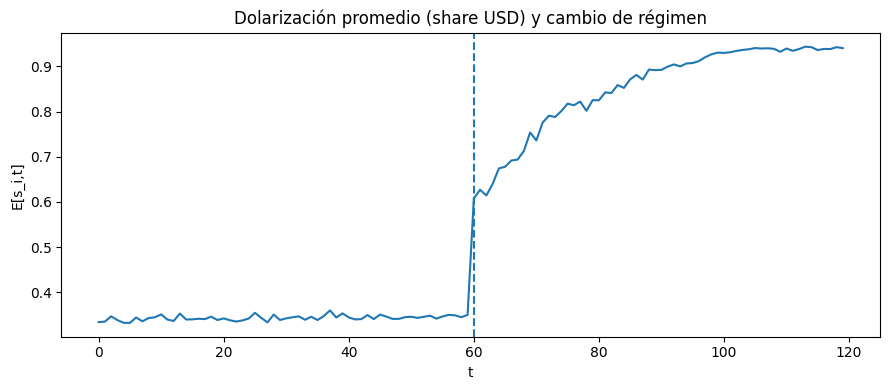

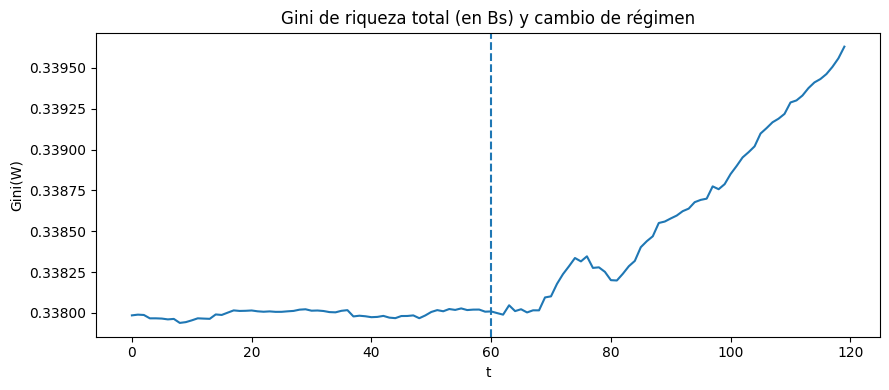

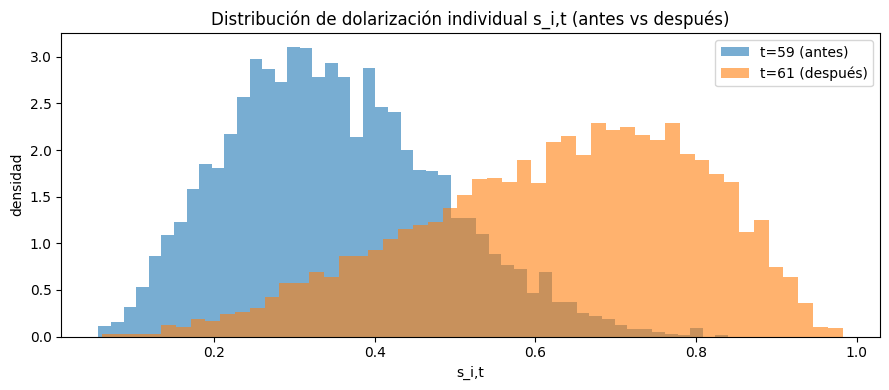

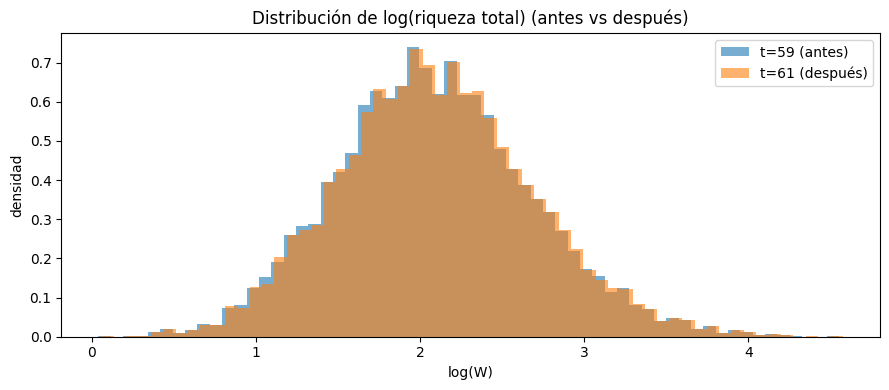

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Utilidades: Gini + cuantiles
# -------------------------
def gini(x):
    x = np.asarray(x, dtype=float)
    if np.allclose(x.sum(), 0): 
        return 0.0
    x = np.sort(x)
    n = x.size
    cumx = np.cumsum(x)
    return (n + 1 - 2*np.sum(cumx)/cumx[-1]) / n

def qstats(x, qs=(0.1,0.5,0.9)):
    return np.quantile(x, qs)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# -------------------------
# 1) Regímenes: parámetros de cartera (desdolarización vs dolarización)
# -------------------------
par0 = dict(a0=-1.2, a_pi=2.0, a_de=2.2, a_R=1.2, a_inf=0.4, a_idiff=2.0, sigma=0.6)  # z=0
par1 = dict(a0=-0.6, a_pi=3.8, a_de=4.2, a_R=2.5, a_inf=0.8, a_idiff=2.5, sigma=0.8)  # z=1

# -------------------------
# 2) Genera (o reemplaza) trayectorias macro: e^p, pi, scarcity, r_bs
#    Sustituye estas series por las que salgan de tu ABM completo.
# -------------------------
T = 120
t_switch = 60

rng = np.random.default_rng(123)

e_par = np.zeros(T)
pi = np.zeros(T)
scar = np.zeros(T)
r_bs = np.zeros(T)
r_usd = 0.002  # mensual stylized

e_par[0] = 7.5
pi[0] = 0.004
scar[0] = 0.10
r_bs[0] = 0.008

for t in range(T-1):
    # shock de estrés externo/FX a partir de t_switch: sube escasez, deprec, inflación
    stress = 0.0 if t < t_switch else 1.0
    
    scar[t+1] = np.clip(scar[t] + 0.02*stress + rng.normal(0, 0.01), 0.0, 1.0)
    dlog_e = 0.002 + 0.015*stress + 0.02*scar[t] + rng.normal(0, 0.01)
    e_par[t+1] = e_par[t] * np.exp(dlog_e)
    
    pi[t+1] = np.clip(0.6*pi[t] + 0.20*dlog_e + 0.03*scar[t] + rng.normal(0, 0.005), -0.01, 0.08)
    r_bs[t+1] = np.clip(r_bs[t] + 0.001*(pi[t] - 0.005) - 0.001*stress, 0.0, 0.02)

# -------------------------
# 3) Regla de régimen: exógena (simple) o endógena (umbral)
# -------------------------
# Exógena:
z = np.zeros(T, dtype=int)
z[t_switch:] = 1

# Si quieres endógena, comenta lo anterior y usa algo así:
# z = np.zeros(T, dtype=int)
# prem = e_par / 6.96 - 1.0
# for t in range(1, T):
#     if z[t-1] == 0:
#         z[t] = 1 if (scar[t] > 0.35 or pi[t] > 0.02 or prem[t] > 0.25) else 0
#     else:
#         z[t] = 0 if (scar[t] < 0.20 and pi[t] < 0.012 and prem[t] < 0.15) else 1

# -------------------------
# 4) Hogares: heterogeneidad (informalidad + riqueza inicial)
# -------------------------
N = 5000
phi_informal = 0.839
informal = (rng.random(N) < phi_informal)

# riqueza inicial (lognormal) en Bs; USD inicial pequeño
A_bs = np.exp(rng.normal(1.2, 0.8, size=N))      # Bs
A_usd = np.exp(rng.normal(-1.8, 0.6, size=N))    # USD (pequeño)
A_usd = np.maximum(A_usd, 0.0)

# -------------------------
# 5) Dinámica micro: elección de cartera + "rebalanceo" + retornos
#    (mínimo para análisis de distribución; integra tus ingresos/empleo si quieres)
# -------------------------
snapshots = {}  # guarda distribuciones en fechas clave
series = {"dollar_mean": [], "gini_wealth": [], "w_p10": [], "w_p50": [], "w_p90": []}

for t in range(T):
    # parámetros por régimen
    p = par0 if z[t] == 0 else par1
    
    # expectativas adaptativas muy simples (usa tus expectativas del ABM si las tienes)
    exp_pi = pi[t]
    exp_de = np.log(e_par[t]/e_par[t-1]) if t > 0 else 0.0
    
    # diferencial de tasas (premio por Bs vs USD)
    idiff = (r_bs[t] - r_usd)
    
    # regla logit de dolarización deseada s_i,t
    zeta = (p["a0"]
            + p["a_pi"]*exp_pi
            + p["a_de"]*exp_de
            + p["a_R"]*scar[t]
            + p["a_inf"]*informal.astype(float)
            - p["a_idiff"]*idiff
            + rng.normal(0, p["sigma"], size=N))
    s = sigmoid(zeta)
    s = np.clip(s, 0.001, 0.999)
    
    # riqueza total en Bs (valorada al paralelo)
    W = A_bs + e_par[t]*A_usd
    
    # rebalanceo hacia share deseado (simplificado: sin fricción; añade fricción si quieres)
    target_usd_value = s * W
    target_usd = target_usd_value / e_par[t]
    target_bs = (1 - s) * W
    
    A_usd = target_usd
    A_bs = target_bs
    
    # retornos (depósitos Bs y “USD”)
    A_bs = A_bs * (1 + r_bs[t])
    A_usd = A_usd * (1 + r_usd)
    
    # estadísticas de distribución
    W_next = A_bs + e_par[t]*A_usd
    series["dollar_mean"].append(s.mean())
    series["gini_wealth"].append(gini(W_next))
    p10, p50, p90 = qstats(W_next, (0.1, 0.5, 0.9))
    series["w_p10"].append(p10); series["w_p50"].append(p50); series["w_p90"].append(p90)
    
    # snapshots alrededor del switch
    if t in [t_switch-1, t_switch+1, T-1]:
        snapshots[t] = {"s": s.copy(), "W": W_next.copy()}

# -------------------------
# 6) Gráficos: cambio de distribución antes vs después
# -------------------------
plt.figure(figsize=(9,4))
plt.plot(series["dollar_mean"])
plt.axvline(t_switch, linestyle="--")
plt.title("Dolarización promedio (share USD) y cambio de régimen")
plt.xlabel("t")
plt.ylabel("E[s_i,t]")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(series["gini_wealth"])
plt.axvline(t_switch, linestyle="--")
plt.title("Gini de riqueza total (en Bs) y cambio de régimen")
plt.xlabel("t")
plt.ylabel("Gini(W)")
plt.tight_layout()
plt.show()

# Histograma de s antes vs después
t0, t1 = t_switch-1, t_switch+1
plt.figure(figsize=(9,4))
plt.hist(snapshots[t0]["s"], bins=50, density=True, alpha=0.6, label=f"t={t0} (antes)")
plt.hist(snapshots[t1]["s"], bins=50, density=True, alpha=0.6, label=f"t={t1} (después)")
plt.title("Distribución de dolarización individual s_i,t (antes vs después)")
plt.xlabel("s_i,t")
plt.ylabel("densidad")
plt.legend()
plt.tight_layout()
plt.show()

# Histograma de riqueza antes vs después (en escala log para cola)
plt.figure(figsize=(9,4))
plt.hist(np.log(snapshots[t0]["W"]+1e-9), bins=60, density=True, alpha=0.6, label=f"t={t0} (antes)")
plt.hist(np.log(snapshots[t1]["W"]+1e-9), bins=60, density=True, alpha=0.6, label=f"t={t1} (después)")
plt.title("Distribución de log(riqueza total) (antes vs después)")
plt.xlabel("log(W)")
plt.ylabel("densidad")
plt.legend()
plt.tight_layout()
plt.show()
